# Ensemble : Boosting

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : XGB

In [7]:
# 모델 선언
model = XGBClassifier(n_estimators = 5)

In [8]:
# 학습
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       769
           1       0.67      0.72      0.70       731

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



## 4.시각화와 변수중요도

### (1) 모델 시각화

xgboost 자체 plot_tree 함수를 제공합니다. 

* plot_tree(model, num_trees = 0)
    * num_trees : 전체 트리 5개짜리 모델이므로 각각 0~4까지 인덱스로 조회해 볼 수 있다.

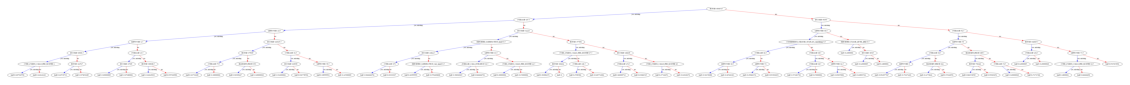

In [11]:
plt.rcParams['figure.figsize'] = 20,20
plot_tree(model, num_trees = 0)
plt.show()

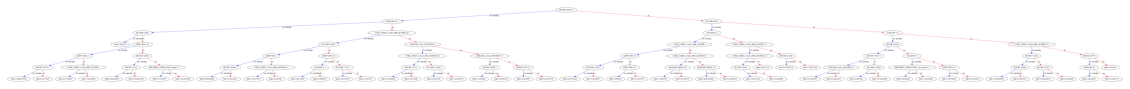

In [12]:
plot_tree(model, num_trees = 4)
plt.show()

### (2) 변수 중요도

In [13]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.04530415 0.12009237 0.19194081 0.11272172 0.13279922 0.06022841
 0.04685733 0.03811195 0.         0.04008486 0.         0.04205307
 0.         0.02807601 0.05156877 0.         0.0399426  0.
 0.05021862 0.        ]


* 변수중요도 그래프 그리기 함수 만들기

In [14]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

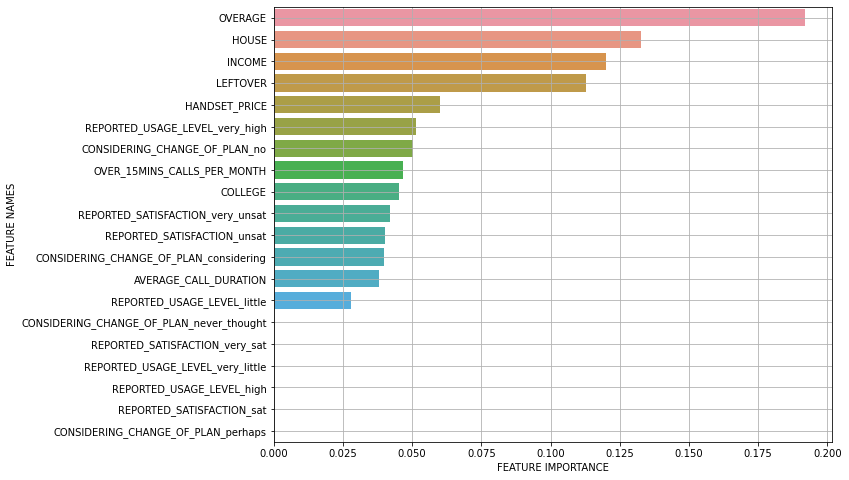

In [15]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습 : 튜닝
* xgboost에 대해 grid search로 튜닝을 수행해 봅시다.
    * cv = 5
    * grid 파라미터
        - max_depth : 3~8 사이에서 3개 선택
        - n_estimators : 50~150 사이에서 3개 선택
        - learning_rate :0.01~ 0.2 사이에서 3개 선택

In [30]:
params = {'max_depth':range(3,9), 'n_estimators':[50,100,150], 'learning_rate':[0.05, 0.1, 0.15, 0.2]}
model = XGBClassifier()
model_xg1 = GridSearchCV(model, params, cv=5)

In [31]:
model_xg1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [32]:
pred1 = model_xg1.predict(x_val)

In [33]:
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       769
           1       0.68      0.70      0.69       731

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500



In [35]:
model_xg1.best_params_

{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100}

In [34]:
model_xg1.best_score_

0.6917142857142858

* 변수 중요도

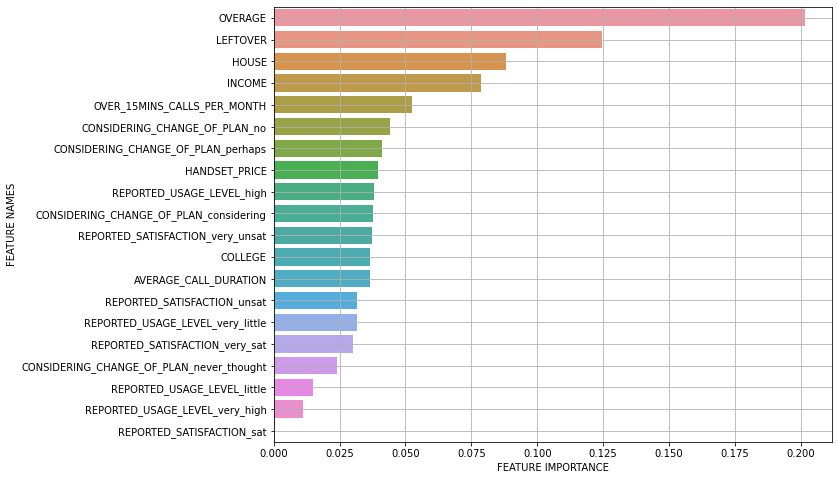

In [36]:
result = plot_feature_importance(model_xg1.best_estimator_.feature_importances_, x_train.columns)

## 6.하이퍼파라미터 변화에 따른 성능 추세

### (1) n_estimators
* 1~150까지 증가시켜가며 성능 추세 살펴보기

In [37]:
grid_param = {'n_estimators':range(1,200,2)}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [38]:
result = pd.DataFrame(model_gs.cv_results_)

In [39]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,1,0.679714
1,3,0.675143
2,5,0.686571
3,7,0.686000
4,9,0.686857


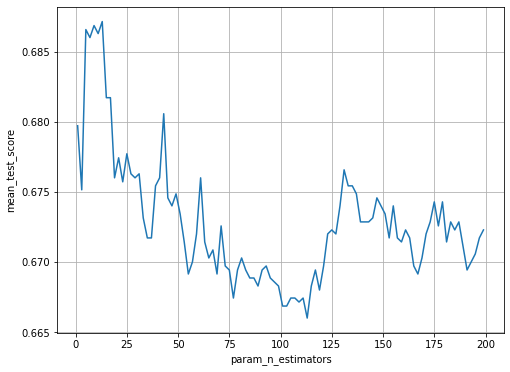

In [40]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_n_estimators', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

### (2) learning rate
* 0.01 ~ 1까지 증가시켜가며 성능 추세 살펴보기

In [43]:
grid_param = {'learning_rate':np.linspace(0.01,1,100)}
model = XGBClassifier()
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.

In [44]:
result = pd.DataFrame(model_gs.cv_results_)

In [45]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_learning_rate','mean_test_score']]
temp.head()

,param_learning_rate,mean_test_score
0,0.01,0.678857
1,0.02,0.687143
2,0.03,0.685714
3,0.04,0.685143
4,0.05,0.684000


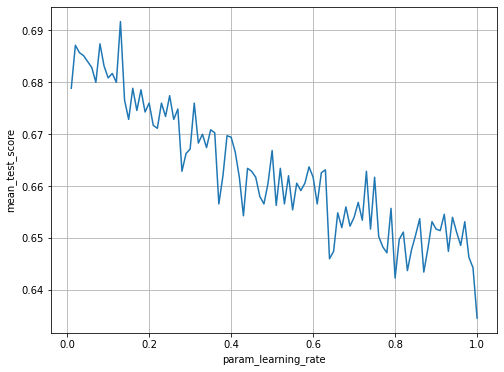

In [46]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp )
plt.grid()
plt.show()

### (3) n_estimators + learning rate
* 이번에는 두 하이퍼파라미터를 동시에 조절하며 추세를 살펴보겠습니다.
* n_estimators : 30, 50, 100, 150
* learning_rate : 0.05 ~ 0.3까지 0.01씩 증가

In [48]:
grid_param = {'learning_rate':np.linspace(0.001,0.1,30),
              'n_estimators':[20,30,50,100]}
model = XGBClassifier(eval_metric='logloss')
model_gs = GridSearchCV(model, grid_param, cv = 5)
model_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
             param_grid={'learning_rate': array([0.001     , 0.00441379, 0.00782759, 0.01124138, 0.01465517,
       0.01806897, 0.02148276, 0.02489655, 0.02831034, 0.03172414,
       0.03513793, 0.03855172, 0.

In [49]:
result = pd.DataFrame(model_gs.cv_results_)

In [50]:
# 이 중에서 하이퍼파라미터 값에 따른 성능을 별도로 저장합시다.
temp = result.loc[:, ['param_n_estimators', 'param_learning_rate','mean_test_score']]
temp.head()

,param_n_estimators,param_learning_rate,mean_test_score
0,20,0.001,0.681143
1,30,0.001,0.680571
2,50,0.001,0.681143
3,100,0.001,0.681714
4,20,0.004414,0.682000


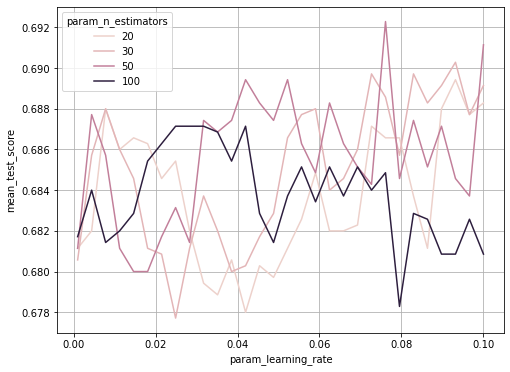

In [51]:
# 이를 차트로 그려봅시다.
plt.figure(figsize = (8,6))
sns.lineplot(x = 'param_learning_rate', y = 'mean_test_score', data = temp, hue = 'param_n_estimators')
plt.grid()
plt.show()